# Explore Magnetron2_FRB Output
Let's take a look at what `magnetron2_FRB` actually returns. Using the priors for CHIME. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [7]:
datadir = "/mnt/c/Users/Mariska Hoogkamer/Documents/UvA/FRBs/data/data_CHIME/data/CHIME_short_lightcurve/"
res_dir = "/home/mariska/UvA/magnetron2/output_no_scat/"

## TEST ONES
# frb_name = "FRB20190201A_waterfall" # extreme amplitude
# frb_name = "FRB20181221B_waterfall" # extreme scale 
# frb_name = "FRB20181013A_waterfall"
# frb_name = "FRB20190624B_waterfall"

## Outliers
# frb_name = "FRB20190323D_waterfall"
# frb_name = "FRB20190624B_waterfall"
frb_name = "FRB20190518A_waterfall"

### Loading data

In [6]:
def get_data(datadir:str, frb_name):
    data = np.loadtxt(f"{datadir}{frb_name}.dat")

    time = data[:,0]
    flux = data[:,1]
    flux_err = data[:,2]

    return time, flux, flux_err

### Loading results

See what the posterior looks like:

In [8]:
sample = np.loadtxt(f"{res_dir}{frb_name}/{frb_name}_posterior_sample.txt", skiprows=2)
nsamples = len(sample)
print(f"There are {nsamples} samples in the posterior")

There are 207 samples in the posterior


First, let's get out some of the global parameters: the background, and the hyperparameters for the prior distributions on the component amplitude, rise time, peak time and skewness parameter.
Sample (posterior_sample.txt) contains nsamples with each nsample (background parameter, burst dimensionality, number of model components, amplitude (hyper), sigma amplitude (hyper), etc.)

In [9]:
def get_params(res_dir : str, frb_name: str, time:list):

    sample = np.loadtxt(f"{res_dir}{frb_name}/{frb_name}_posterior_sample.txt", skiprows=2)
    nsamples = len(sample)

    # background parameter
    bkg = sample[:,0]

    # dimensionality of a single component
    burst_dims =  sample[:,1]
    burst_dims = list(set(burst_dims))[0]

    # total number of model components permissible in the model
    compmax = sample[:,2]
    compmax = list(set(compmax))[0]

    # hyper-parameter (mean) of the Gaussian distribution used
    # as prior for the spike amplitudes
    # NOTE: IN LINEAR SPACE, NOT LOG
    hyper_mean_amplitude = sample[:,3]
    hyper_sigma_amplitude = sample[:,4] # NOT IN CASE OF EXP AMPLITUDE PRIOR

    # hyper-parameter (mean) for the exponential distribution used
    # as prior for the spike rise time
    # NOTE: IN LINEAR SPACE, NOT LOG
    hyper_mean_risetime = sample[:,5]
    hyper_sigma_risetime = sample[:,6]

    # hyper-parameters for the lower and upper limits of the uniform
    # distribution osed as a prior for the skew
    hyper_lowerlimit_skew = sample[:,7]
    hyper_upperlimit_skew = sample[:,8]

    ## distribution over number of model components
    nbursts = sample[:, 9]
    #print(nbursts)

    # individual burst parameters for all 100 components
    npos = sample[:,10:110] # peak position for all burst components
    amp = sample[:,110:210] # amplitude for all burst components
    scale = sample[:,210:310] # rise time for all burst components
    skew = sample[:, 310:410] # skewness parameter for all burst components

    # put all of the parameters together
    pars_all = np.array([npos, amp, scale, skew]).T

    # this is the 'endproduct': the flux of the model lightcurve 
    # for every sample 
    ymodel_all = sample[:,-len(time):] # model flux

    return bkg, hyper_mean_amplitude, hyper_sigma_amplitude, hyper_mean_risetime, hyper_sigma_risetime, hyper_lowerlimit_skew, hyper_upperlimit_skew, nbursts, npos, amp, scale, skew, pars_all, ymodel_all

In [10]:
time, flux, flux_err = get_data(datadir, frb_name)
bkg, hyper_mean_amplitude, hyper_sigma_amplitude, hyper_mean_risetime, hyper_sigma_risetime, hyper_lowerlimit_skew, hyper_upperlimit_skew, nbursts, npos, amp, scale, skew, pars_all, ymodel_all = get_params(res_dir, frb_name, time)  

Text(0.5, 1.0, 'skewness parameter upper limit')

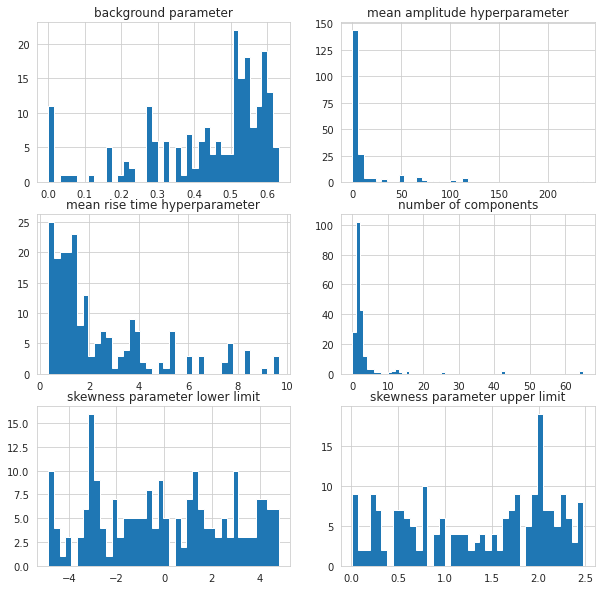

In [11]:
nbins = 40

__, axes = plt.subplots(3,2, figsize=(10,10))
axes = np.hstack(axes)
axes[0].hist(bkg, bins=nbins, histtype="stepfilled")
axes[0].set_title("background parameter")

axes[1].hist(hyper_mean_amplitude, bins=nbins, histtype="stepfilled")
axes[1].set_title("mean amplitude hyperparameter")

axes[2].hist(hyper_mean_risetime, bins=nbins, histtype="stepfilled")
axes[2].set_title("mean rise time hyperparameter")

axes[3].hist(nbursts, bins=int(np.max(nbursts)), histtype="stepfilled")
axes[3].set_title("number of components")

axes[4].hist(hyper_lowerlimit_skew , bins=nbins, histtype="stepfilled");
axes[4].set_title("skewness parameter lower limit")

axes[5].hist(hyper_upperlimit_skew , bins=nbins, histtype="stepfilled");
axes[5].set_title("skewness parameter upper limit")

Text(0.5, 0, 'Time [ms]')

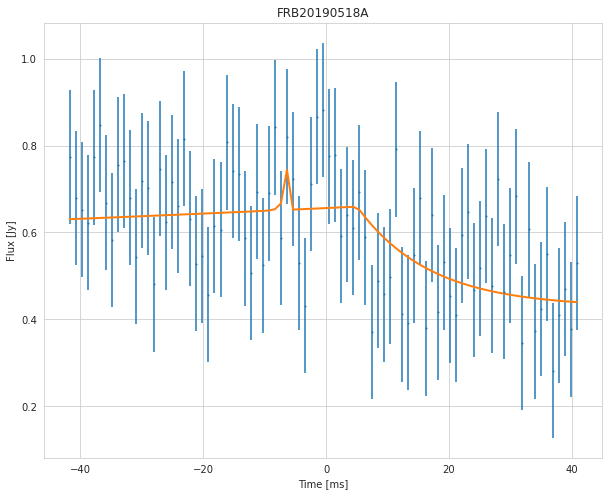

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))

ax.errorbar(time, flux, yerr=flux_err, fmt="o", markersize=1)

# The range indicates the amount of samples you plot below. 
# for i in range(1):

i = 166
# Plot the model lightcurve for i samples 
ax.plot(time, ymodel_all[i,:], lw=2)
ax.set_title(frb_name.split("_")[0])
ax.set_ylabel("Flux [Jy]")
ax.set_xlabel("Time [ms]")

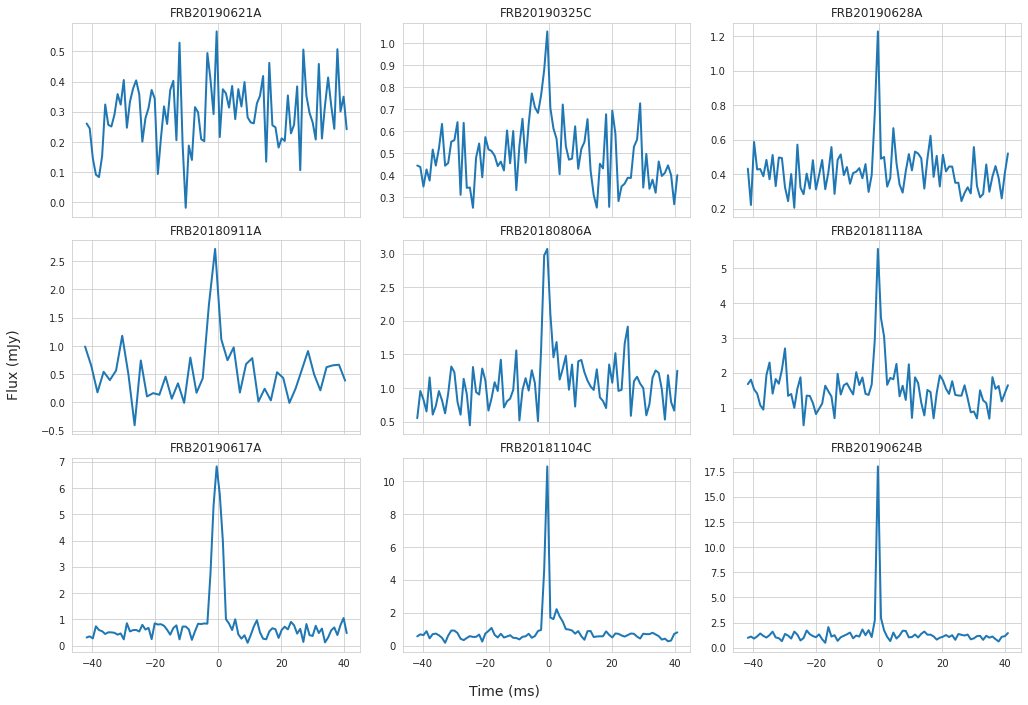

In [13]:
frb_names= ["FRB20190621A_waterfall", "FRB20190325C_waterfall", "FRB20190628A_waterfall", 
"FRB20180911A_waterfall", "FRB20180806A_waterfall", "FRB20181118A_waterfall", 
 "FRB20190617A_waterfall", "FRB20181104C_waterfall", "FRB20190624B_waterfall"]

#  "FRB20181118B_waterfall", "FRB20190325A_waterfall", ]

# frb_names= ["FRB20190621B_waterfall", "FRB20190325A_waterfall", "FRB20180814A_waterfall", 
#   "FRB20180911C_waterfall",  
#  "FRB20190617B_waterfall", "FRB20181014D_waterfall", "FRB20181018C_waterfall"]

# "FRB20181118B_waterfall", "FRB20190325A_waterfall", "FRB20180911A_waterfall",

fig, axs = plt.subplots(3, 3, figsize=(15,10),  sharex=True)
fig.tight_layout(pad=1.5)

plt.subplots_adjust(left=0.1, bottom=0.1)

fig.text(0.5, 0.04, "Time (ms)", ha='center', size=14)
fig.text(0.04, 0.5, "Flux (mJy)", va='center', rotation='vertical', size=14)

for frb_name, ax in zip(frb_names, axs.ravel()):
    time, flux, flux_err = get_data(datadir, frb_name)
    # __, __, __, __, __, __, __, __, __, __, __, __, __, ymodel_all = get_params(res_dir, frb_name, time)

    for i in range(1): # amout of posterior models drawn 

        # ax.errorbar(time, flux, yerr=flux_err, fmt="o", markersize=1)
        ax.plot(time, flux, lw=2)
        ax.set_title(frb_name.split("_")[0])
        # ax.set_ylabel("Flux (mJy)")
        # ax.set_xlabel("Time (ms)")



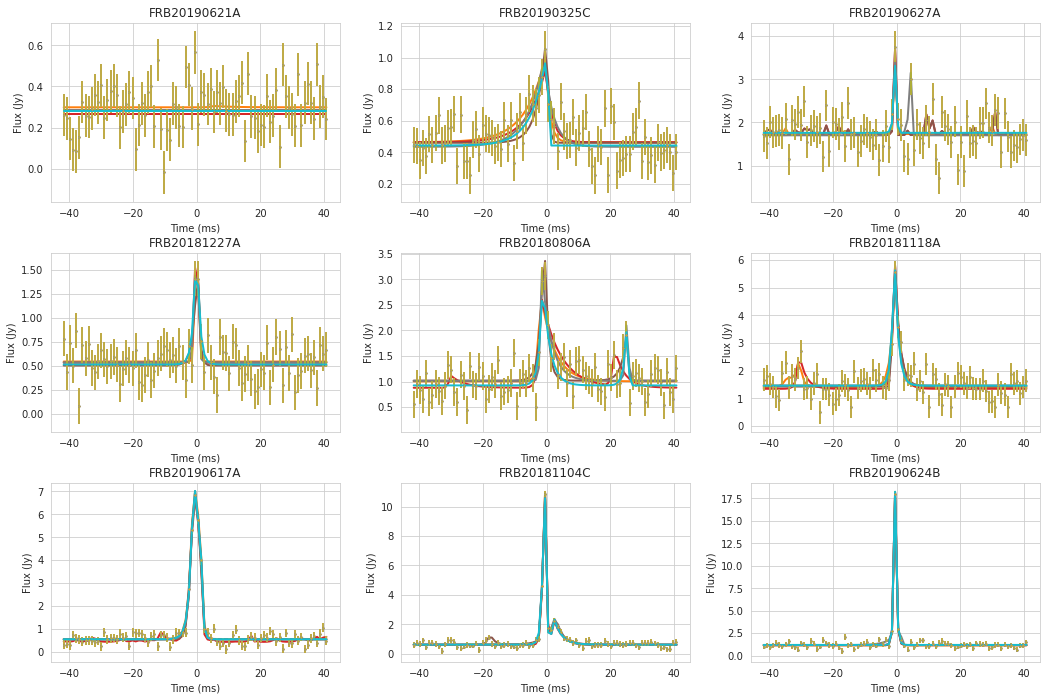

In [14]:
frb_names= ["FRB20190621A_waterfall", "FRB20190325C_waterfall", "FRB20190627A_waterfall", 
 "FRB20181227A_waterfall", "FRB20180806A_waterfall", "FRB20181118A_waterfall", 
 "FRB20190617A_waterfall", "FRB20181104C_waterfall", "FRB20190624B_waterfall"]

# FRB20190628A_waterfall

fig, axs = plt.subplots(3, 3, figsize=(15,10))
fig.tight_layout(pad=3.0)

for frb_name, ax in zip(frb_names, axs.ravel()):
    # for i, ax in enumerate(fig.axes):
    time, flux, flux_err = get_data(datadir, frb_name)
    __, __, __, __, __, __, __, __, __, __, __, __, __, ymodel_all = get_params(res_dir, frb_name, time)

    for i in range(5): # amout of posterior models drawn 

        ax.errorbar(time, flux, yerr=flux_err, fmt="o", markersize=1)
        ax.plot(time, ymodel_all[i,:], lw=2)
        ax.set_title(frb_name.split("_")[0])
        ax.set_ylabel("Flux (Jy)")
        ax.set_xlabel("Time (ms)")

        

### Plotting components for a single posterior sample

For a single posterior sample, let's plot the individual components that make up the overall model for the burst light curve.

We'll just pick the first set of parameters in the posterior sample:

In [15]:
idx = 1 # index for the first posterior sample

n = nbursts[idx] # number of components in the burst
print("The number of components in this model is " + str(n))

pars = pars_all[:, idx, :] # get out all of the parameters for that model
pars = pars[:int(n),:] # I only need the parameters that are non-zero and correspond to real components
bkg_level = bkg[idx] # get background level for that model

The number of components in this model is 3.0


Text(0.5, 0, 'Time [ms]')

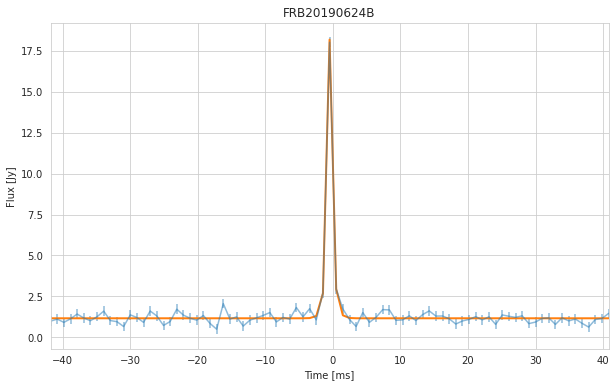

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.errorbar(time, flux, yerr=flux_err, alpha=0.5)

ymodel = ymodel_all[idx,:]

ax.plot(time, ymodel, lw=2)
ax.set_xlim(time[0], time[-1])
ax.set_title(frb_name.split("_")[0])
ax.set_ylabel("Flux [Jy]")
ax.set_xlabel("Time [ms]")

Let's make a function for the Fast-Rise, Exponential Decay (FRED) model that magnetron2 uses for the individual components.

In [18]:
def twoexp(time, theta, bkg_level):
    """ The function definition for a Fast-Rise Exponential-Decay (FRED) model. 

    Parameters:
    theta = list containing the peak position, amplitude, rise time 
    and skewness of the model lightcurve
    time = time series of the actual lightcurve  
    bkg_level = average level of the background noise (default: 0) 

    Returns: 
    Numpy-array of size len(self.times) with flux values. 
    """
    t0 = theta[0]
    amp = theta[1]
    scale = theta[2]
    skew = theta[3]
    
    t = (time - t0) / scale
    y = np.zeros_like(t)
    y[t <= 0] = np.exp(t[t <= 0]) 
    y[t > 0] = np.exp(-t[t > 0] / skew) 

    y = np.array(y)*amp + bkg_level

    return y

[-37.8086     0.315412  10.7773     5.14516 ]
[-0.239504  0.396236  0.737362  3.51772 ]
[-8.06596   0.202176  0.703039  0.779024]


Text(0.5, 0, 'Time [ms]')

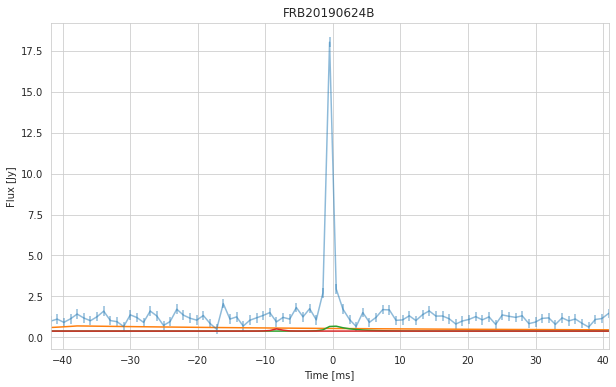

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

# plot the data
ax.errorbar(time, flux, yerr=flux_err, alpha=0.5)

# make an empty array for the total model fluxes
ymodel = np.zeros_like(time)

# loop over the components
for p in pars:
    print(p) # npos, amp, scale, skew 
    # compute single component flux
    ytest = twoexp(time, p, bkg_level)
    
    # add component to the total flux
    ymodel += ytest
    
    # plot just the component
    ax.plot(time, ytest)

# set x-range
ax.set_xlim(time[0], time[-1])
ax.set_xlim(time[0], time[-1])
ax.set_title(frb_name.split("_")[0])
ax.set_ylabel("Flux [Jy]")
ax.set_xlabel("Time [ms]")

Let's zoom in on the large peak:

npos -1.5371354666666667e+01
amp 0.30460800000000005
3


(-10.0, 20.0)

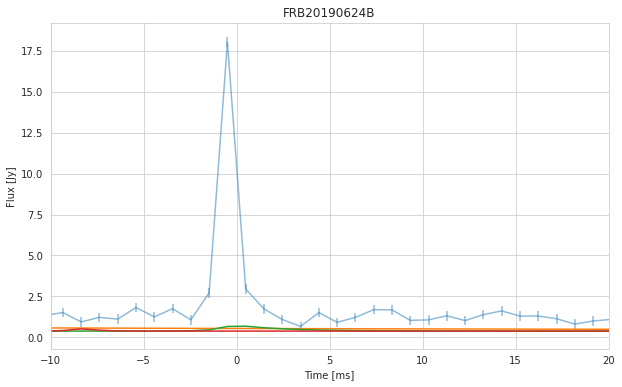

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

# plot the data
ax.errorbar(time, flux, yerr=flux_err, alpha=0.5)

# make an empty array for the total model fluxes
ymodel = np.zeros_like(time)

cnt = 0 

npos_avg = []
amp_avg = []


# loop over the components
for p in pars[:]:

    npos_avg.append(p[0])
    amp_avg.append(p[1])
    cnt +=1
    # print(p)
    # compute single component flux
    ytest = twoexp(time, p, bkg_level)
    
    # add component to the total flux
    ymodel += ytest
    
    # plot just the component
    ax.plot(time, ytest)
    ax.set_title(frb_name.split("_")[0])
    ax.set_ylabel("Flux [Jy]")
    ax.set_xlabel("Time [ms]")

print('npos', np.mean(npos_avg))
print("amp", np.mean(amp_avg))
print(cnt)
# set x-range
ax.set_xlim(-10, 20)


## Create an example of a FRED

In [24]:
tseg = 10.0
dt = 0.01
t0 = 4.0
tau = 0.5
skew = 3.0
amp = 20.0

bkg = 3.0

theta = [t0, amp, tau, skew]

time = np.linspace(0, tseg, int(tseg/dt))
 
ytrue = twoexp(time, theta, bkg) 

yerr = np.zeros_like(ytrue) + 1.0

yobs = np.random.normal(ytrue, yerr)

Text(6.0, 10.0, '$τ s$')

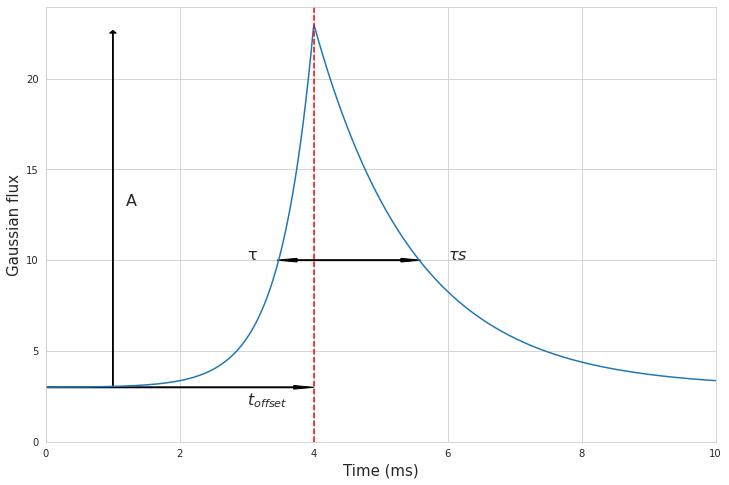

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

fs = 15

ax.plot(time, ytrue)
ax.set_ylabel("Gaussian flux", fontsize=fs)
ax.set_xlabel("Time (ms)", fontsize=fs)
ax.set_ylim(0)
ax.set_xlim(0,10)
ax.vlines(x=4.0, ymin=0.0, ymax=25, colors="red", linestyles="dashed")

ax.arrow(x=4.0, y=10.0, dx=-0.25, dy=0.0, width=0.05, color='black', head_width=0.2)
ax.arrow(x=4.0, y=10.0, dx=1.3, dy=0.0, width=0.05, color='black', head_width=0.2)

ax.arrow(x=0.0, y=3.0, dx=3.7, dy=0.0, width=0.05, color='black', head_width=0.2)
ax.arrow(x=1.0, y=3.0, dx=0.0, dy=19.5, width=0.01, color='black', head_width=0.1)

ax.annotate("A", xy=(1.2, 13), fontsize=fs+1)
ax.annotate(r'$t_{offset}$', xy=(3.0, 2.0), fontsize=fs+1)
ax.annotate(u"\u03C4", xy=(3.0, 10.0), fontsize=fs+1)
ax.annotate(u"$\u03C4 s$", xy=(6.0, 10.0), fontsize=fs+1)